In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from utils import *

In [2]:
# prepare data
x0_f = "./data/linear_vectorfield_data_x0.txt"
x1_f = "./data/linear_vectorfield_data_x1.txt"
x0 = pd.read_csv(x0_f, header=None, delimiter=" ").values
x1 = pd.read_csv(x1_f, header=None, delimiter=" ").values

del_t = 0.1
vec = (x1 - x0) / del_t

## Part One

In [3]:
Approximator = LinearApprox()
v_hat = Approximator.linear_approx(x0, vec)

## Part Two

In [8]:
x1_hat = v_hat * del_t + x0
mse = np.square(x1 - x1_hat).mean()

print("Mean Squared Error: ", mse)

Mean Squared Error:  5.2660926699020454e-17


## Part Three

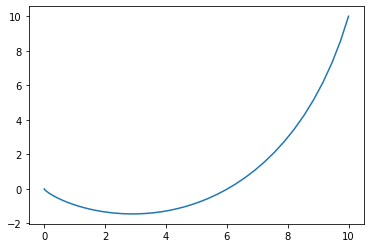

In [38]:
T = 100
x0 = np.array([[10, 10]])
x_pred = [[10, 10]]

for _ in np.arange(T, step=del_t):
    v_hat = Approximator.predict(x_pred[-1])
    x_hat = v_hat * del_t + x_pred[-1]
    x_pred.append(x_hat)

x_pred = np.vstack(x_pred)

# trajectory
plt.figure()
plt.plot(x_pred[:, 0], x_pred[:, 1])
plt.show()

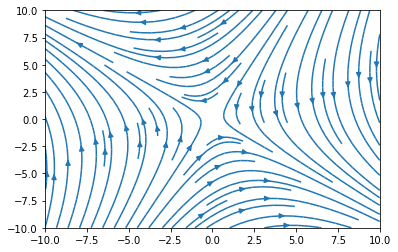

In [44]:
# phase portrait
x = y = np.linspace(-10, 10, 100)
matrix = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
predict = Approximator.predict(matrix)
dx = predict[:, 0].reshape(y.shape[0], x.shape[0])
dy = predict[:, 1].reshape(y.shape[0], x.shape[0])

plt.figure()
a1 = plt.subplot()
a1.streamplot(x, y, dx, dy)
plt.show()